# Combining & organizing data

## Libraries and settings

In [255]:
# Libraries
import os
import pandas as pd
import numpy as np
import fnmatch

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Show current working directory
print(os.getcwd())

/workspaces/data_analytics/Week_03


## Importing the prepared rental apartments data

In [256]:
# Read data to pandas data frame
df_orig = pd.read_csv('apartments_data_prepared.csv', 
                      sep=',', 
                      encoding='utf-8')

# Copy of data with selected colums
columns = [ 'web-scraper-order', 
            'address_raw',
            'rooms', 
            'area', 
            'luxurious',
            'price',
            'price_per_m2']
df = df_orig[columns]

# Get number of rows and columns
print(df.shape)

# Show first records
df.head(5)

(865, 7)


,web-scraper-order,address_raw,rooms,area,luxurious,price,price_per_m2
0,1693998201-1,"Neuhusstrasse 6, 8630 Rüti ZH, ZH",3.0,49.0,0,1441.0,29.41
1,1693998201-2,"Zürcherstrasse 1, 8173 Neerach, ZH",3.5,65.0,0,1850.0,28.46
2,1693998201-4,"Cramerstrasse 8-12, 8004 Zürich, ZH",2.0,54.0,0,4853.0,89.87
3,1693998201-5,"Rotachstrasse 33, 8003 Zürich, ZH",2.0,49.0,0,4335.0,88.47
4,1693998201-16,"Wolframplatz 1, 8045 Zürich, ZH",2.0,32.0,0,3515.0,109.84


## Combining data from different sources

### Reading rental apartment data with geocoded addresses

In [257]:
# Meaning of variables
# lat: geographical latitude
# lon: geographical longitude
# bfs_number: official municipality id
# bfs_name: official municipality name

# Geocoded data (i.e. data with latitude and longitude)
df_geo = pd.read_csv('apartments_data_geocoded.csv', 
                     sep=',', 
                     encoding='utf-8')

# Rename columns
df_geo = df_geo.rename(columns={'web-scrape':'web-scraper-order',
                                'address_ra':'address_raw',
                                'BFS_NUMMER':'bfs_number', 
                                'NAME':'bfs_name'})

# Show data
df_geo[['web-scraper-order',
        'address_raw',
        'lat', 
        'lon', 
        'bfs_number', 
        'bfs_name']].head()

,web-scraper-order,address_raw,lat,lon,bfs_number,bfs_name
0,1693998201-1,"Neuhusstrasse 6, 8630 Rüti ZH, ZH",47.252171,8.845797,118,Rüti (ZH)
1,1693998201-2,"Zürcherstrasse 1, 8173 Neerach, ZH",47.513332,8.474851,88,Neerach
2,1693998201-5,"Rotachstrasse 33, 8003 Zürich, ZH",47.370792,8.514748,261,Zürich
3,1693998201-16,"Wolframplatz 1, 8045 Zürich, ZH",47.362282,8.522193,261,Zürich
4,1693998205-25,"Badenerstrasse 67, 8953 Dietikon, ZH",47.407925,8.392561,243,Dietikon


### Join geo-information to rental apartment data using .merge()

In [258]:
df2 = df.merge(df_geo[['web-scraper-order', 
                       'lat', 
                       'lon', 
                       'bfs_number', 
                       'bfs_name']], 
               on="web-scraper-order")
df2.head()

,web-scraper-order,address_raw,rooms,area,luxurious,price,price_per_m2,lat,lon,bfs_number,bfs_name
0,1693998201-1,"Neuhusstrasse 6, 8630 Rüti ZH, ZH",3.0,49.0,0,1441.0,29.41,47.252171,8.845797,118,Rüti (ZH)
1,1693998201-2,"Zürcherstrasse 1, 8173 Neerach, ZH",3.5,65.0,0,1850.0,28.46,47.513332,8.474851,88,Neerach
2,1693998201-5,"Rotachstrasse 33, 8003 Zürich, ZH",2.0,49.0,0,4335.0,88.47,47.370792,8.514748,261,Zürich
3,1693998201-16,"Wolframplatz 1, 8045 Zürich, ZH",2.0,32.0,0,3515.0,109.84,47.362282,8.522193,261,Zürich
4,1693998205-25,"Badenerstrasse 67, 8953 Dietikon, ZH",3.5,105.0,0,3200.0,30.48,47.407925,8.392561,243,Dietikon


### Reading municipality-level data

In [259]:
# Meaning of variables:
# bfs_number: official municipality id
# bfs_name: official municipality name
# pop: number of residents (=population)
# pop_dens: population density (pop per km2)
# frg_pct: percentage foreigners
# emp: numer of employees

df_municip = pd.read_excel('municipality_data.xlsx', 
                           sheet_name='data_for_import')
df_municip.head(5)

,bfs_number,bfs_name,pop,pop_dens,frg_pct,emp,mean_taxable_income
0,1,Aeugst am Albis,1981,250.442478,14.184755,442.0,105013.570634
1,2,Affoltern am Albis,12303,1161.756374,28.700317,6920.0,71059.805603
2,3,Bonstetten,5572,749.932705,16.564968,1014.0,88927.698145
3,4,Hausen am Albis,3751,275.808824,16.022394,1021.0,86300.455137
4,5,Hedingen,3778,578.560490,16.410799,1478.0,90811.205330


### Join municipality data to rental apartment data using .merge()

In [260]:
# Merge needs a key which must be identical in both data sets (here the key is 'bfs_number')
df3 = df2.merge(df_municip[['bfs_number', 
                            'pop', 
                            'pop_dens', 
                            'frg_pct', 
                            'emp',
                            'mean_taxable_income']], 
                on="bfs_number")
df3.head(5)

,web-scraper-order,address_raw,rooms,area,luxurious,price,price_per_m2,lat,lon,bfs_number,bfs_name,pop,pop_dens,frg_pct,emp,mean_taxable_income
0,1693998201-1,"Neuhusstrasse 6, 8630 Rüti ZH, ZH",3.0,49.0,0,1441.0,29.41,47.252171,8.845797,118,Rüti (ZH),12286,1221.272366,24.841283,5053.0,65362.042683
1,1693998201-2,"Zürcherstrasse 1, 8173 Neerach, ZH",3.5,65.0,0,1850.0,28.46,47.513332,8.474851,88,Neerach,3175,525.662252,13.322835,641.0,111422.358722
2,1693998201-5,"Rotachstrasse 33, 8003 Zürich, ZH",2.0,49.0,0,4335.0,88.47,47.370792,8.514748,261,Zürich,420217,4778.994655,32.458468,491193.0,82932.737704
3,1693998201-16,"Wolframplatz 1, 8045 Zürich, ZH",2.0,32.0,0,3515.0,109.84,47.362282,8.522193,261,Zürich,420217,4778.994655,32.458468,491193.0,82932.737704
4,1693998205-25,"Badenerstrasse 67, 8953 Dietikon, ZH",3.5,105.0,0,3200.0,30.48,47.407925,8.392561,243,Dietikon,27746,2970.663812,46.226483,18911.0,64662.737784


### Export data to file

In [261]:
# Remove missing values which may have ocured from the merging process
df3 = df3.dropna()

# Check for missing values per column
print(df3.isna().sum())

# Count number of rows and columns
print(df3.shape)

# Export apartment data to file
df3.to_csv('apartments_data_enriched.csv',
            sep=',',
            encoding='utf-8')

web-scraper-order      0
address_raw            0
rooms                  0
area                   0
luxurious              0
price                  0
price_per_m2           0
lat                    0
lon                    0
bfs_number             0
bfs_name               0
pop                    0
pop_dens               0
frg_pct                0
emp                    0
mean_taxable_income    0
dtype: int64
(786, 16)


### Sorting data

In [262]:
# Sorting data by 'price' and 'area' with highest price above (ascending=False)
df3.sort_values(by=['price', 'area'], 
                ascending=False).head()

,web-scraper-order,address_raw,rooms,area,luxurious,price,price_per_m2,lat,lon,bfs_number,bfs_name,pop,pop_dens,frg_pct,emp,mean_taxable_income
261,1693998265-365,"Gustav-Gull-Platz 4, 8004 Zürich, ZH",4.5,140.0,0,9950.0,71.07,47.379471,8.531120,261,Zürich,420217,4778.994655,32.458468,491193.0,82932.737704
262,1693998265-366,"Engweg 8, 8006 Zürich, ZH",4.5,140.0,0,9170.0,65.50,47.385265,8.537632,261,Zürich,420217,4778.994655,32.458468,491193.0,82932.737704
145,1693998236-207,"Etzelstrasse 35, 8038 Zürich, ZH",3.5,100.0,1,9150.0,91.50,47.346546,8.530695,261,Zürich,420217,4778.994655,32.458468,491193.0,82932.737704
136,1693998236-197,"Utoquai 37, 8008 Zürich, ZH",3.5,169.0,0,9000.0,53.25,47.363682,8.546781,261,Zürich,420217,4778.994655,32.458468,491193.0,82932.737704
346,1693998285-475,"Universitätstrasse 41, 8006 Zürich, ZH",4.5,140.0,0,8990.0,64.21,47.380440,8.547943,261,Zürich,420217,4778.994655,32.458468,491193.0,82932.737704


### Aggregation of data

In [263]:
# Aggregation using .groupby()
df3[['rooms', 'price']].groupby(['rooms']).mean()

,price
rooms,
1.0,1306.346154
1.5,2110.166667
2.0,2155.846154
2.5,2423.468085
3.0,1964.022727
3.5,2699.044335
4.0,2852.357143
4.5,3067.847561
5.0,2881.666667


## Reshaping data

### Reshaping data using .stack() and .unstack()

In [264]:
df_sub = df3[['bfs_name', 'rooms', 'price', 'area']][:5]
print('Original shape')
print(df_sub, '\n')

df_sub_stacked = df_sub.stack()
print('Stacked')
print(df_sub_stacked, '\n')

# Using unstack
print('Unstacked (= back to original shape)')
print(df_sub_stacked.unstack())

Original shape
    bfs_name  rooms   price   area
0  Rüti (ZH)    3.0  1441.0   49.0
1    Neerach    3.5  1850.0   65.0
2     Zürich    2.0  4335.0   49.0
3     Zürich    2.0  3515.0   32.0
4   Dietikon    3.5  3200.0  105.0 

Stacked
0  bfs_name    Rüti (ZH)
   rooms             3.0
   price          1441.0
   area             49.0
1  bfs_name      Neerach
   rooms             3.5
   price          1850.0
   area             65.0
2  bfs_name       Zürich
   rooms             2.0
   price          4335.0
   area             49.0
3  bfs_name       Zürich
   rooms             2.0
   price          3515.0
   area             32.0
4  bfs_name     Dietikon
   rooms             3.5
   price          3200.0
   area            105.0
dtype: object 

Unstacked (= back to original shape)
    bfs_name rooms   price   area
0  Rüti (ZH)   3.0  1441.0   49.0
1    Neerach   3.5  1850.0   65.0
2     Zürich   2.0  4335.0   49.0
3     Zürich   2.0  3515.0   32.0
4   Dietikon   3.5  3200.0  105.0


### Reshaping data using .melt()

In [265]:
df_sub = df3[['rooms', 'price', 'area']][:5]
print('Original shape')
print(df_sub, '\n')

print('Reshaped using .melt()')
print(pd.melt(df, id_vars=['rooms'], value_vars=['price', 'area']))

Original shape
   rooms   price   area
0    3.0  1441.0   49.0
1    3.5  1850.0   65.0
2    2.0  4335.0   49.0
3    2.0  3515.0   32.0
4    3.5  3200.0  105.0 

Reshaped using .melt()
      rooms variable   value
0       3.0    price  1441.0
1       3.5    price  1850.0
2       2.0    price  4853.0
3       2.0    price  4335.0
4       2.0    price  3515.0
...     ...      ...     ...
1725    3.5     area    82.0
1726    4.0     area    73.0
1727    4.5     area   110.0
1728    3.0     area    68.0
1729    4.5     area   114.0

[1730 rows x 3 columns]


### Pivoting data using .pivot_table()

   rooms   price   area  price_per_m2 price_per_m2_cat
0    3.0  1441.0   49.0         29.41              low
1    3.5  1850.0   65.0         28.46              low
2    2.0  4853.0   54.0         89.87           medium
3    2.0  4335.0   49.0         88.47           medium
4    2.0  3515.0   32.0        109.84             high
5    3.5  3200.0  105.0         30.48              low
6    5.5  2750.0  140.0         19.64              low
7    4.5  2700.0  104.0         25.96              low
8    5.5  3390.0  150.0         22.60              low
9    3.0  2450.0   70.0         35.00              low


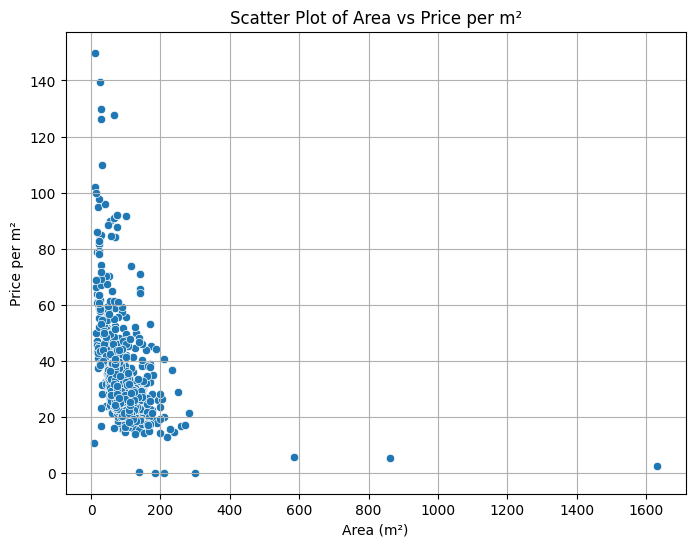

Correlation between area and price_per_m2: -0.33


In [266]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate price per m²
df['price_per_m2'] = round(df['price'] / df['area'], 2)

# Define categories for price per m²
labels = ['low', 'medium', 'high']
df["price_per_m2_cat"] = pd.cut(df['price_per_m2'], bins=[0, 50, 100, 1000], labels=labels)

# Show the first few rows of relevant data
print(df[['rooms', 'price', 'area', 'price_per_m2', 'price_per_m2_cat']].head(10))

# Calculate and visualize correlation
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='area', y='price_per_m2')
plt.title('Scatter Plot of Area vs Price per m²')
plt.xlabel('Area (m²)')
plt.ylabel('Price per m²')
plt.grid(True)
plt.show()

# Calculate correlation coefficient
correlation = df['area'].corr(df['price_per_m2'])
print(f'Correlation between area and price_per_m2: {correlation:.2f}')


 -0.3 ist nicht mega aussagekräftig also einen zusammenhang gibt es nicht zwingend. Ich mag jedoch zu erkennen, dass der Preis eher steigt desto kleiner die Fläche ist... 

### New pivot table I

The pivot table shows the distribution of apartments by the number of rooms. In total, there are {total_apartments} apartments.

In [267]:
pivot_count = pd.pivot_table(df, 
                             index='rooms',
                             values='web-scraper-order',  
                             aggfunc='count') 
pivot_count = pivot_count.reset_index()
pivot_count.columns = ['rooms', 'apartment_count'] 

total_apartments = pivot_count['apartment_count'].sum()

print(pivot_count)
print(f"\nTotal Apartments: {total_apartments}")

    rooms  apartment_count
0     1.0               54
1     1.5               38
2     2.0               42
3     2.5              151
4     3.0               51
5     3.5              232
6     4.0               31
7     4.5              175
8     5.0                5
9     5.5               57
10    6.0                4
11    6.5               17
12    7.0                3
13    7.5                3
14    8.0                1
15    8.5                1

Total Apartments: 865


### New pivot table II

In [268]:
# Create the pivot table with mean values for municipality
pivot_municipality = pd.pivot_table(df3, 
                                    index='bfs_number', 
                                    values=['rooms', 'area', 'price', 'price_per_m2'], 
                                    aggfunc='mean')

# Round to one decimal place
pivot_municipality = pivot_municipality.round(1)

# Sort the pivot table by 'price' and 'area' with the most expensive municipalities on top
pivot_municipality_sorted = pivot_municipality.sort_values(by=['price', 'area'], ascending=False)

# Display the sorted pivot table
pivot_municipality_sorted.head(10)


,area,price,price_per_m2,rooms
bfs_number,,,,
139,144.0,6660.0,46.2,4.5
154,136.3,4891.7,35.5,4.5
64,506.5,4500.0,17.6,6.0
195,138.5,4250.0,30.4,4.5
10,127.5,4095.0,31.9,5.5
213,248.5,4070.0,16.3,6.0
161,101.4,4060.8,40.3,4.0
4,175.0,3720.0,21.3,5.5
158,123.8,3478.8,29.1,4.0


### Jupyter notebook --footer info-- (please always provide this at the end of each submitted notebook)

In [269]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Linux | 6.5.0-1025-azure
Datetime: 2024-10-08 17:34:38
Python Version: 3.11.10
-----------------------------------
